# Exploring the  Dataframe



In [2]:
# Misc
import os
import sys
from timeit import default_timer as timer 
import datetime
now = datetime.datetime.now()

# Data manipulation
from modules.Dataframe import*

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.stats import norm,kstest


from scipy.signal import welch
# Sanity check for jupyter notebooks
print("Current working directory:", os.getcwd())

ModuleNotFoundError: No module named 'modules'

# Loading the dataframe

In [14]:

Data=pd.read_csv("../../Data/Time_series_DATA.txt",skiprows=149,index_col=0)
#Data=pd.read_csv('https://raw.githubusercontent.com/iceclassic/sandbox/main/Data/Time_series_DATA.txt',index_col=0,skiprows=149)
Data.index = Data.index.astype(str).str.split().str[0]
Data.index = pd.to_datetime(Data.index, format="%Y-%m-%d")

Data = Data[(Data.index.year >= 1915) & (Data.index.year < 2024)]
Data.index = Data.index.year
Data=Data.drop(columns=['Days since start of year','Days until break up','Predicted ice thickness [m]','Noisy predicted ice thickness [m]'])

## Exploring

In [15]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40413 entries, 1915 to 2023
Data columns (total 22 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Regional: Air temperature [C]                      38563 non-null  float64
 1   Nenana: Rainfall [mm]                              29516 non-null  float64
 2   Nenana: Snowfall [mm]                              19945 non-null  float64
 3   Nenana: Snow depth [mm]                            15984 non-null  float64
 4   Nenana: Mean water temperature [C]                 2418 non-null   float64
 5   Nenana: Mean Discharge [m3/s]                      22525 non-null  float64
 6   Nenana: Air temperature [C]                        31146 non-null  float64
 7   Fairbanks: Average wind speed [m/s]                9797 non-null   float64
 8   Fairbanks: Rainfall [mm]                           29586 non-null  float64
 9   Fairbanks

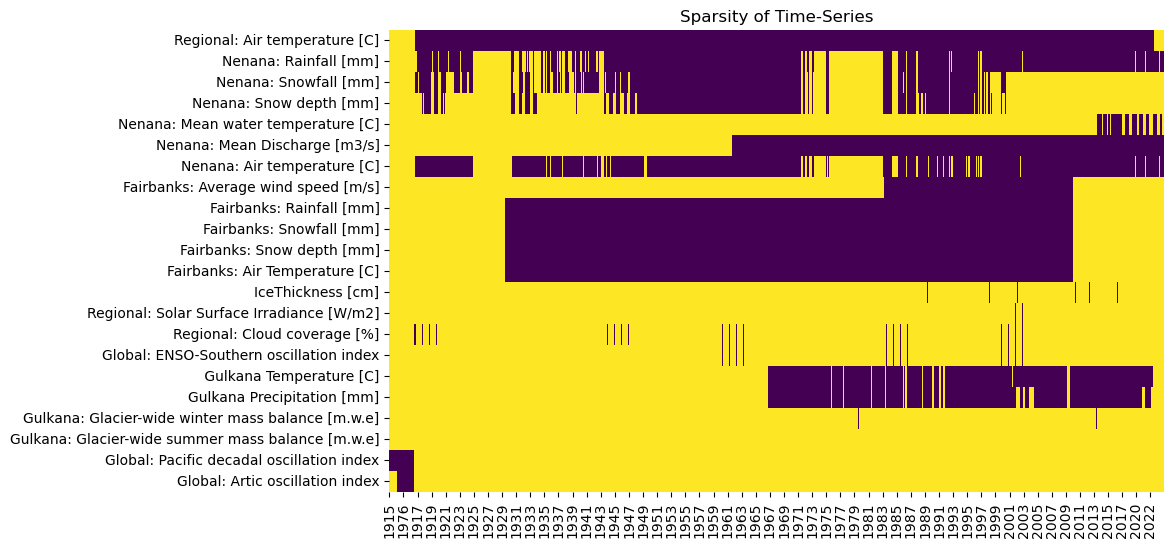

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Assuming Data contains your DataFrame

# Create a heatmap plot with column names on the y-axis
plt.figure(figsize=(10, 6))
sns.heatmap(Data.T.isnull(), cbar=False, cmap='viridis', yticklabels=Data.columns)
plt.title('Sparsity of Time-Series')
plt.show()



In [21]:
Data=pd.read_csv("../../Data/Time_series_DATA.txt",skiprows=149,index_col=0)
#Data=pd.read_csv('https://raw.githubusercontent.com/iceclassic/sandbox/main/Data/Time_series_DATA.txt',index_col=0,skiprows=149)
Data.index = Data.index.astype(str).str.split().str[0]
Data.index = pd.to_datetime(Data.index, format="%Y-%m-%d")

Data = Data[(Data.index.year >= 1915) & (Data.index.year < 2024)]
Data=Data.drop(columns=['Days since start of year','Days until break up','Predicted ice thickness [m]','Noisy predicted ice thickness [m]'])

# Inspecting the dataframe

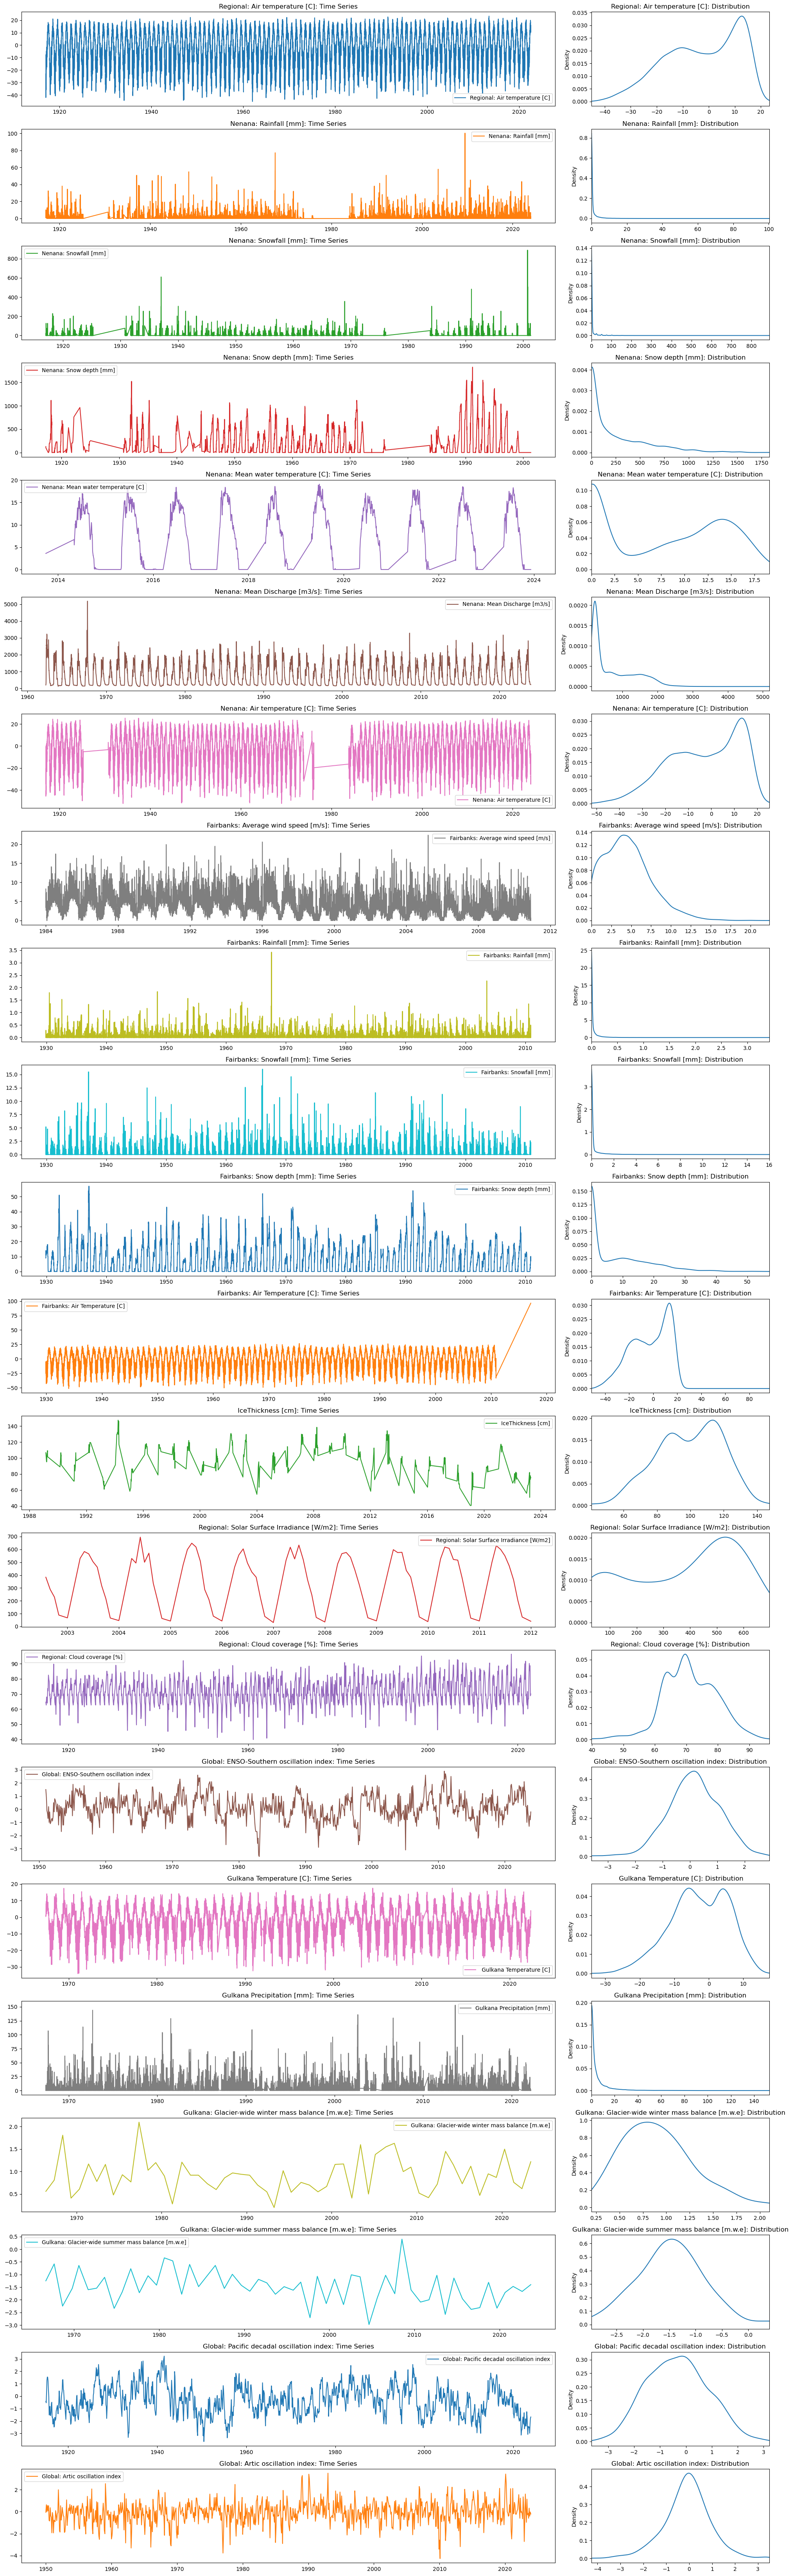

In [22]:
import matplotlib.pyplot as plt

# Assuming Data is your DataFrame with columns to plot

fig, axs = plt.subplots(nrows=len(Data.columns), ncols=2, figsize=(20, 3*len(Data.columns)), 
                        gridspec_kw={'width_ratios': [3, 1]})  # Adjust the width ratio here

plt.subplots_adjust(wspace=0.2)  

for i, col in enumerate(Data.columns):
    # Plot line 
    col_data = Data[col].copy()
    col_data.dropna(inplace=True)
    if not col_data.empty:
        axs[i, 0].plot(col_data.index, col_data.values, label=col, color=plt.cm.tab10(i % 10))
        axs[i, 0].legend()
        axs[i, 0].set_title(str(col)+': Time Series')  # Title for the line plot
    # Plot density 
        Data[col].plot.density(ax=axs[i, 1])
        axs[i, 1].set_xlim(left=Data[col].min(), right=Data[col].max())  # Set x-axis limits to column range
        axs[i, 1].set_ylabel('Density')
        axs[i, 1].set_title(str(col)+': Distribution')  # Title for the line plot

    

plt.tight_layout()
plt.show()




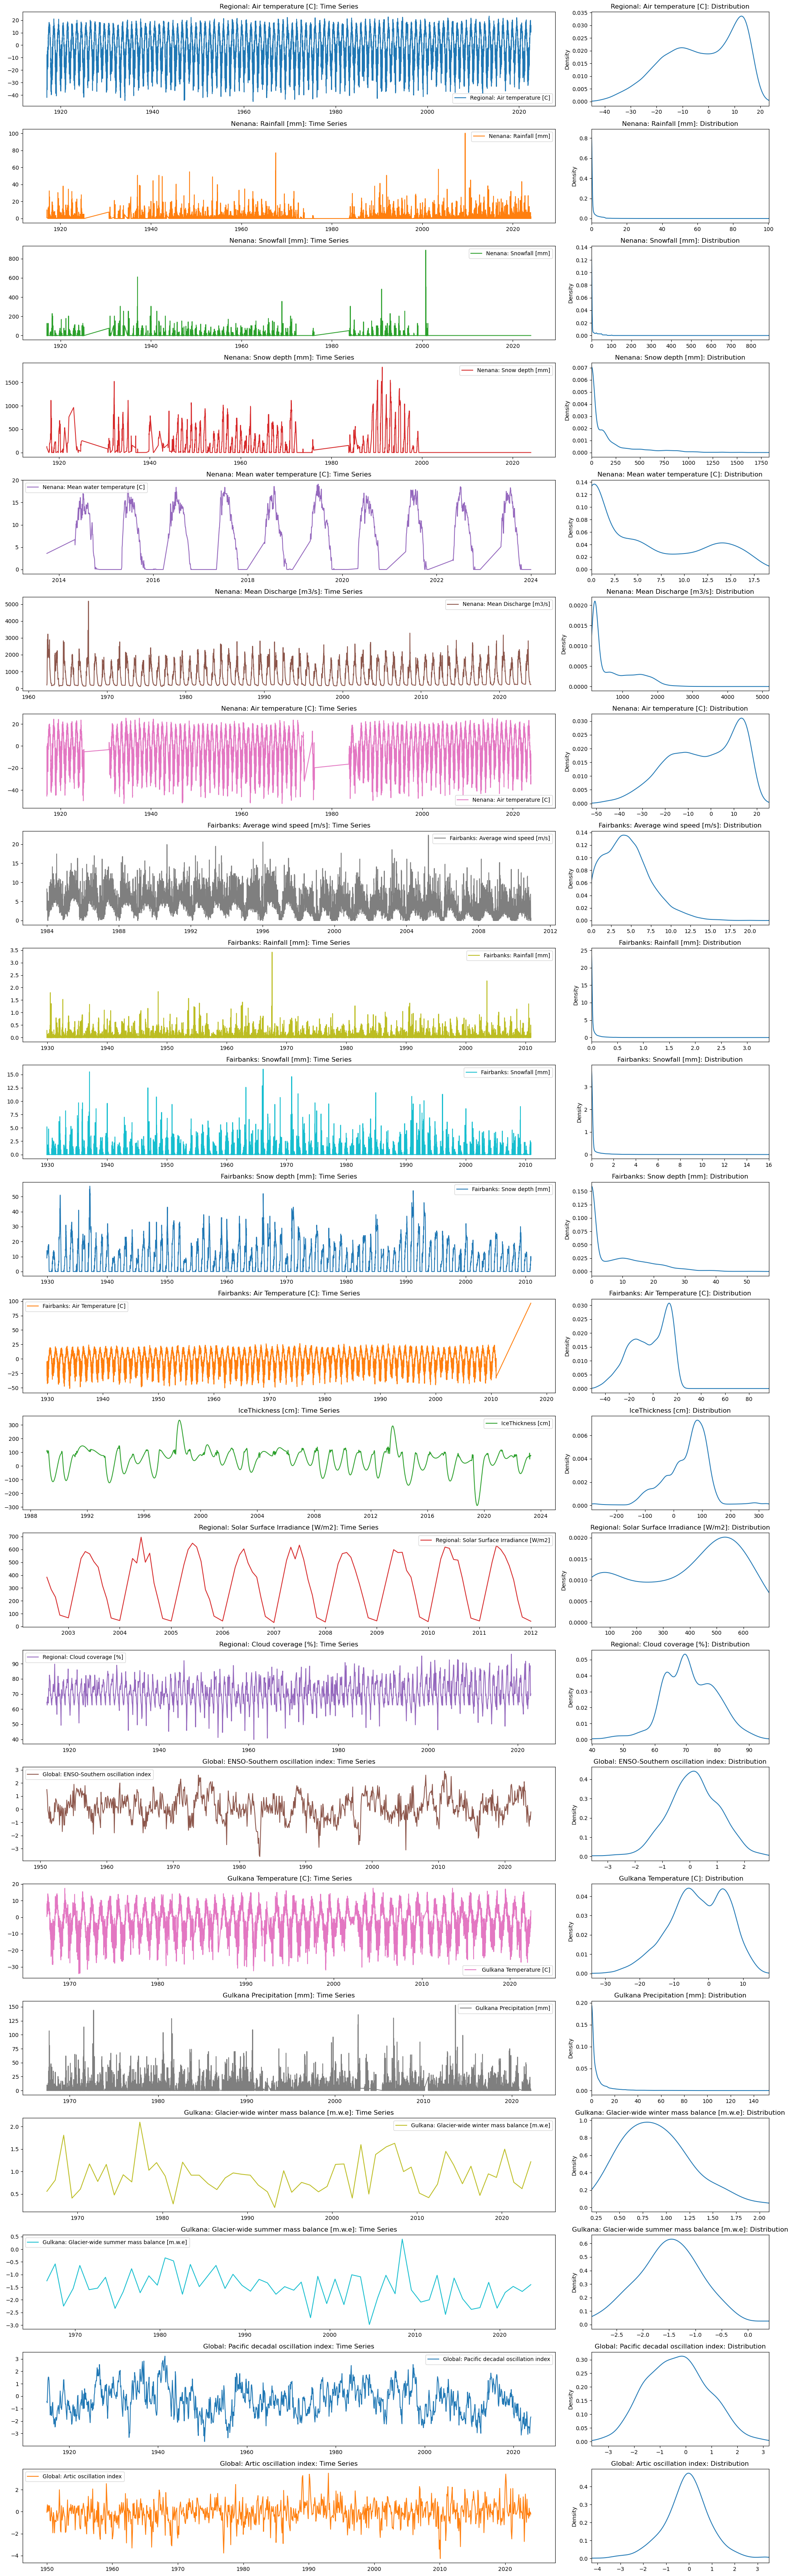

In [31]:
def interpolate_columns(df, columns_to_interpolate,Order):
    df_interpolated = df.copy()
    for column in columns_to_interpolate:
        df_interpolated[column] = df_interpolated[column].interpolate(method='polynomial', order=Order)
    return df_interpolated

columns_to_interpolate = ['Nenana: Rainfall [mm]', 'Nenana: Snowfall [mm]', 'Nenana: Snow depth [mm]', 'Nenana: Mean water temperature [C]']

# Interpolate the specified columns
Data = interpolate_columns(Data, columns_to_interpolate,3)

import matplotlib.pyplot as plt

# Assuming Data is your DataFrame with columns to plot

fig, axs = plt.subplots(nrows=len(Data.columns), ncols=2, figsize=(20, 3*len(Data.columns)), 
                        gridspec_kw={'width_ratios': [3, 1]})  # Adjust the width ratio here

plt.subplots_adjust(wspace=0.2)  

for i, col in enumerate(Data.columns):
    # Plot line 
    col_data = Data[col].copy()
    col_data.dropna(inplace=True)
    if not col_data.empty:
        axs[i, 0].plot(col_data.index, col_data.values, label=col, color=plt.cm.tab10(i % 10))
        axs[i, 0].legend()
        axs[i, 0].set_title(str(col)+': Time Series')  # Title for the line plot
    # Plot density 
        Data[col].plot.density(ax=axs[i, 1])
        axs[i, 1].set_xlim(left=Data[col].min(), right=Data[col].max())  # Set x-axis limits to column range
        axs[i, 1].set_ylabel('Density')
        axs[i, 1].set_title(str(col)+': Distribution')  # Title for the line plot

    

plt.tight_layout()
plt.show()


## Interactive Data

In [23]:

def interactive_data(Data):

    Data_clouds= Data.dropna(subset=['Regional: Cloud coverage [%]']).copy()
    Data_ice= Data.dropna(subset=['IceThickness [cm]']).copy()
    Data_solar= Data.dropna(subset=['Regional: Solar Surface Irradiance [W/m2]']).copy()

    # Initialize figure
    fig = go.Figure()

    # Add Traces ( plots elements)
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', name='break up date', line=dict(color='red', width=0.4, dash='dot')))
    fig.add_trace(go.Scatter(x=Data.index,y=Data["Regional: Air temperature [C]"],name="Air temp",yaxis="y",line=dict(color='gold')))
    fig.add_trace(go.Scatter(x=Data.index,y=Data["Predicted ice thickness [m]"]*100,name="Predicted ice thickness",yaxis="y4",line=dict(color='lime')))
    fig.add_trace(go.Scatter(x=Data_ice.index,y=Data_ice["IceThickness [cm]"],name="Ice thickness",yaxis="y4",line=dict(color='navy')))
    fig.add_trace(go.Scatter(x=Data.index,y=Data["Nenana: Rainfall [mm]"],name="Rainfall",yaxis="y2",line=dict(color='lightseagreen')))
    fig.add_trace(go.Scatter(x=Data.index,y=Data["Nenana: Snowfall [mm]"],name="Snowfall",yaxis="y2",line=dict(color='slateblue')))
    fig.add_trace(go.Scatter(x=Data.index,y=Data["Nenana: Snow depth [mm]"],name='Snow depth',yaxis="y2",line=dict(color='magenta')))
    fig.add_trace(go.Scatter(x=Data.index,y=Data['Nenana: Mean water temperature [C]'],name="Water temp",yaxis="y",line=dict(color='firebrick')))
    fig.add_trace(go.Scatter(x=Data.index,y=Data['Nenana: Mean Discharge [m3/s]'],name="Discharge",yaxis="y3",line=dict(color='dodgerblue')))
    fig.add_trace(go.Scatter(x=Data_clouds.index,y=Data_clouds["Regional: Cloud coverage [%]"],name="Cloud coverage",yaxis="y5",line=dict(color='slategray')))
    fig.add_trace(go.Scatter(x=Data_solar.index,y=Data_solar["Regional: Solar Surface Irradiance [W/m2]"],name="Solar Surface Irradiance",yaxis="y6",line=dict(color='orangered')))
    # dropdown menu to select which timseries to plot
    # fig.update_layout(
    #     updatemenus=[
    #         dict(active=0,
    #             buttons=list([
    #                 dict(label="All",method="update",args=[{"visible": [True, True, True,True,True, True, True,True,True,True]}]),
    #                 dict(label="Temperature",method="update",args=[{"visible":  [True, False, False,False,False, False,True,False,False,False]}]),
    #                 dict(label="Ice+Snow",method="update",args=[{"visible":    [False,True,True,False,True,True,False,False,False,False]}]),
    #                 dict(label="Discharge+Rain",method="update",args=[{"visible":   [False, False, False,True,False, False,False,True,False,False]}]),
    #                 dict(label="Clouds+Solar Radiation",method="update",args=[{"visible":   [False, False, False,False,False, False,False,False,True,True]}])]),)])


    break_up_times=pd.read_csv('https://raw.githubusercontent.com/iceclassic/sandbox/main/Data/BreakUpTimes.csv')
    break_up_times.head()
    break_up_times['timestamp'] = pd.to_datetime(break_up_times[['Year', 'Month', 'Day']])  # want index wiht only date not time
    break_up_times['timestamps'] = pd.to_datetime(break_up_times['timestamp'])
    break_up_times.set_index('timestamp', inplace=True)
    shapes = []
    for date in break_up_times.index:
        shape = {"type": "line","xref": "x","yref": "paper","x0": date,"y0": 0,"x1": date,"y1": 1,"line": {"color": 'red',"width": 0.6,"dash": 'dot'},'name':'break up time'}
        shapes.append(shape)

    fig.update_layout(shapes=shapes)

    # Set title and axis properties
    fig.update_layout(
        title="Break up times & Global Variables at Tenana River-Nenana,AK",
        showlegend=True,
        xaxis=dict(range=["2010-10-01","2011-06-31"],rangeslider=dict(autorange=True),type="date"),
        yaxis=dict(anchor="x",autorange=True,domain=[0, 0.17],linecolor="black",mirror=True,range=[-55.0, 25],
                showline=True,side="left",tickfont={"color": "black"},tickmode="auto",ticks="",title="[C]",
                titlefont={"color": "black"},type="linear",zeroline=False),
        yaxis2=dict(anchor="x",autorange=True,domain=[0.17, 0.34],linecolor="black",mirror=True,range=[0, 50],
                showline=True,side="left",tickfont={"color": "black"},tickmode="auto",ticks="",title="[mm]",
                titlefont={"color": "black"},type="linear",zeroline=False),
        yaxis3=dict(anchor="x",autorange=True,domain=[0.34, 0.51],linecolor="black",mirror=True,range=[0,30],
                showline=True,side="left",tickfont={"color": "black"},tickmode="auto",ticks="",title="[m3/s]",
                titlefont={"color": "black"},type="linear",zeroline=False),
        yaxis4=dict(anchor="x",autorange=True,domain=[0.51, .68],linecolor="black",mirror=True,range=[0,200],
                showline=True,side="left",tickfont={"color": "black"},tickmode="auto",ticks="",title="[cm]",
                titlefont={"color": "black"},type="linear",zeroline=False),
        yaxis5=dict(anchor="x",autorange=True,domain=[0.68, 0.85],linecolor="black",mirror=True,range=[0,200],
                showline=True,side="left",tickfont={"color": "black"},tickmode="auto",ticks="",title="[%]",
                titlefont={"color": "black"},type="linear",zeroline=False),
        yaxis6=dict(anchor="x",autorange=True,domain=[0.85, 1],linecolor="black",mirror=True,range=[0,200],
                showline=True,side="left",tickfont={"color": "black"},tickmode="auto",ticks="",title="[W/m2]",
                titlefont={"color": "black"},type="linear",zeroline=False))


    # Update layout
    fig.update_layout(
        dragmode="zoom",hovermode="x",legend=dict(traceorder="reversed"),height=800,template="plotly",
            margin=dict(t=90,b=90),)

    fig.show()
    # Initialize figure
    fig = go.Figure()

    # Add Traces ( plots elements)
    fig.add_trace(go.Scatter(x=Data.index,y=Data["Predicted ice thickness [m]"]*100,name="Predicted ice thickness",yaxis="y4",line=dict(color='lime')))
    fig.add_trace(go.Scatter(x=Data_ice.index,y=Data_ice["IceThickness [cm]"],name="Ice thickness",yaxis="y4",line=dict(color='navy')))
    fig.add_trace(go.Scatter(x=Data.index,y=Data["Nenana: Snow depth [mm]"]/10,name='Snow depth',yaxis="y4",line=dict(color='magenta')))
    # Set title and axis properties
    fig.update_layout(
        title="Predicted ice thickness",
        showlegend=True,
        xaxis=dict(range=["1990-01-01","1995-12-31"],rangeslider=dict(autorange=True),type="date"),
        yaxis4=dict(anchor="x",autorange=True,linecolor="black",mirror=True,range=[0,200],
                showline=True,side="left",tickfont={"color": "black"},tickmode="auto",ticks="",title="[cm]",
                titlefont={"color": "black"},type="linear",zeroline=False))
    shapes = []
    for date in break_up_times.index:
        shape = {"type": "line","xref": "x","yref": "paper","x0": date,"y0": 0,"x1": date,"y1": 1,"line": {"color": 'red',"width": 0.9,"dash": 'dot'},'name':'break up time'}
        shapes.append(shape)

    fig.update_layout(shapes=shapes)
    fig.update_layout(
        dragmode="zoom",hovermode="x",legend=dict(traceorder="reversed"),height=800,template="plotly",
            margin=dict(t=90,b=150),)

    fig.show()

interactive_data(Data)

NameError: name 'go' is not defined